In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.linalg import logm, expm
import math

In [586]:
fin_data = pd.read_csv("data/fin_data.csv")
fin_data

,Date,P/E,P/B,Div Yield %
0,12 Aug 2022,21.18,4.15,1.35
1,11 Aug 2022,21.29,4.18,1.36
2,10 Aug 2022,21.11,4.21,1.34
3,08 Aug 2022,21.02,4.21,1.33
4,05 Aug 2022,20.86,4.18,1.29
...,...,...,...,...
5872,07 Jan 1999,12.46,2.22,1.71
5873,06 Jan 1999,12.11,2.16,1.75
5874,05 Jan 1999,11.84,2.11,1.79
5875,04 Jan 1999,11.72,2.08,1.81


In [587]:
sprice_data = pd.read_csv("data/sprice_data.csv")
sprice_data


,Date,Open,High,Low,Close
0,12 Aug 2022,17659.65,17724.65,17597.85,17698.15
1,11 Aug 2022,17711.65,17719.30,17631.95,17659.00
2,10 Aug 2022,17566.10,17566.10,17442.80,17534.75
3,08 Aug 2022,17401.50,17548.80,17359.75,17525.10
4,05 Aug 2022,17423.65,17474.40,17348.75,17397.50
...,...,...,...,...,...
7784,10 Jul 1990,NaN,NaN,NaN,288.69
7785,09 Jul 1990,NaN,NaN,NaN,289.69
7786,06 Jul 1990,NaN,NaN,NaN,289.04
7787,05 Jul 1990,NaN,NaN,NaN,284.04


1-P/E is price per earning, and P/B is price per booking. 
2-Book value is the expected value that a firm can expect if it were to sell all of the assets on its balance sheet and cover its outstanding debts and obligations
3-Market value of equity is typically higher than book value of a company's stock.
4-P/B values under 1 are typically considered solid investments by value investors.
5- P/B = Market Price per Share/Book Value per Share

In [588]:
fin_data.describe()

,P/E,P/B
count,5877.000000,5877.000000
mean,20.746117,3.572588
std,5.056217,0.785172
min,10.680000,1.920000
25%,17.410000,3.050000
50%,20.470000,3.500000
75%,23.460000,3.930000
max,42.000000,6.550000


In [589]:
sprice_data.describe()

,Open,High,Low,Close
count,6664.000000,6664.000000,6664.000000,7789.000000
mean,5392.953223,5428.116730,5350.187050,4731.030813
std,4398.416207,4415.879873,4370.905307,4371.076578
min,786.370000,805.820000,775.430000,279.020000
25%,1326.562500,1346.187500,1310.750000,1090.900000
50%,4768.550000,4830.025000,4727.775000,3260.100000
75%,8229.525000,8263.112500,8165.650000,7614.300000
max,18602.350000,18604.450000,18445.300000,18477.050000


In [590]:
fin_data.max()


Date           31 Oct 2019
P/E                   42.0
P/B                   6.55
Div Yield %           3.18
dtype: object

In [591]:
fin_data.min()


Date           01 Apr 1999
P/E                  10.68
P/B                   1.92
Div Yield %              -
dtype: object

In [592]:
sprice_data.max()

Date     31 Oct 2019
Open        18602.35
High        18604.45
Low          18445.3
Close       18477.05
dtype: object

In [593]:
sprice_data.min()

Date     01 Apr 1991
Open          786.37
High          805.82
Low           775.43
Close         279.02
dtype: object

In [594]:
nan_list = []
for i in range(len(sprice_data["Open"])):
    if math.isnan(sprice_data["Open"][i]):
       nan_list.append(sprice_data["Date"][i])
nan_list


['30 Oct 1996',
 '02 Nov 1995',
 '01 Nov 1995',
 '31 Oct 1995',
 '30 Oct 1995',
 '27 Oct 1995',
 '26 Oct 1995',
 '23 Oct 1995',
 '20 Oct 1995',
 '19 Oct 1995',
 '18 Oct 1995',
 '17 Oct 1995',
 '16 Oct 1995',
 '13 Oct 1995',
 '12 Oct 1995',
 '11 Oct 1995',
 '10 Oct 1995',
 '09 Oct 1995',
 '06 Oct 1995',
 '05 Oct 1995',
 '04 Oct 1995',
 '29 Sep 1995',
 '28 Sep 1995',
 '27 Sep 1995',
 '26 Sep 1995',
 '25 Sep 1995',
 '22 Sep 1995',
 '21 Sep 1995',
 '20 Sep 1995',
 '19 Sep 1995',
 '18 Sep 1995',
 '15 Sep 1995',
 '14 Sep 1995',
 '13 Sep 1995',
 '12 Sep 1995',
 '11 Sep 1995',
 '08 Sep 1995',
 '07 Sep 1995',
 '06 Sep 1995',
 '05 Sep 1995',
 '04 Sep 1995',
 '01 Sep 1995',
 '31 Aug 1995',
 '28 Aug 1995',
 '25 Aug 1995',
 '24 Aug 1995',
 '22 Aug 1995',
 '21 Aug 1995',
 '17 Aug 1995',
 '16 Aug 1995',
 '14 Aug 1995',
 '11 Aug 1995',
 '09 Aug 1995',
 '08 Aug 1995',
 '07 Aug 1995',
 '04 Aug 1995',
 '03 Aug 1995',
 '02 Aug 1995',
 '01 Aug 1995',
 '31 Jul 1995',
 '28 Jul 1995',
 '27 Jul 1995',
 '26 Jul

Density Graphs show that Open, High, and Low variables have similar densities

<AxesSubplot:ylabel='Density'>

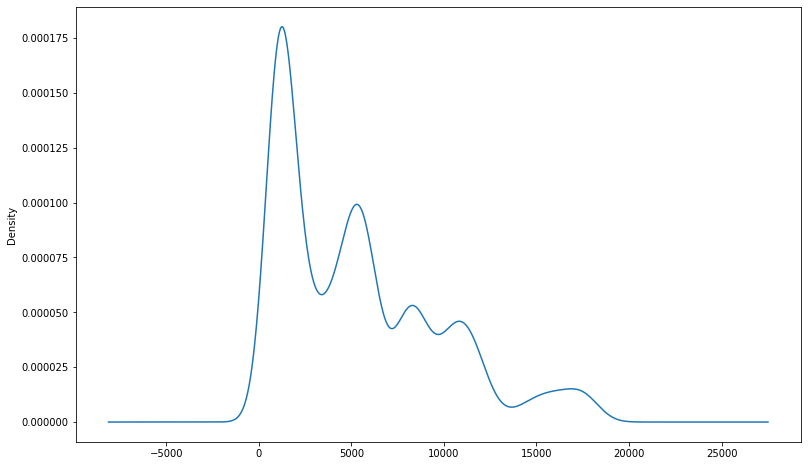

In [595]:
sprice_data["Open"].plot(kind = "density", figsize = (13,8))


<AxesSubplot:ylabel='Density'>

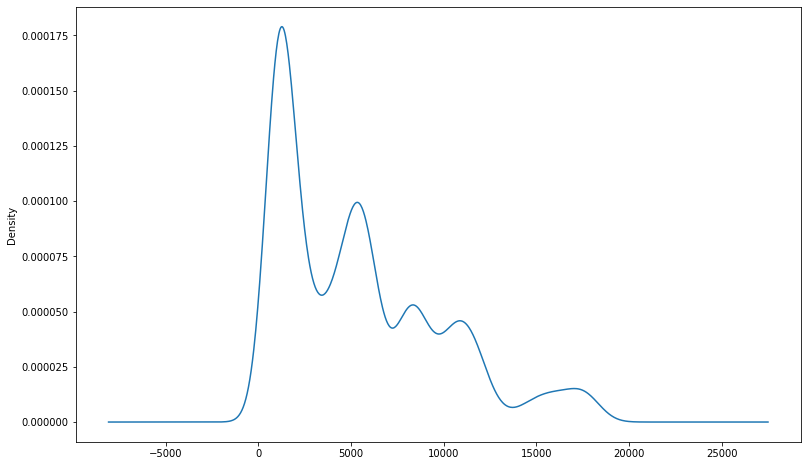

In [596]:
sprice_data["High"].plot(kind = "density", figsize = (13,8))

<AxesSubplot:ylabel='Density'>

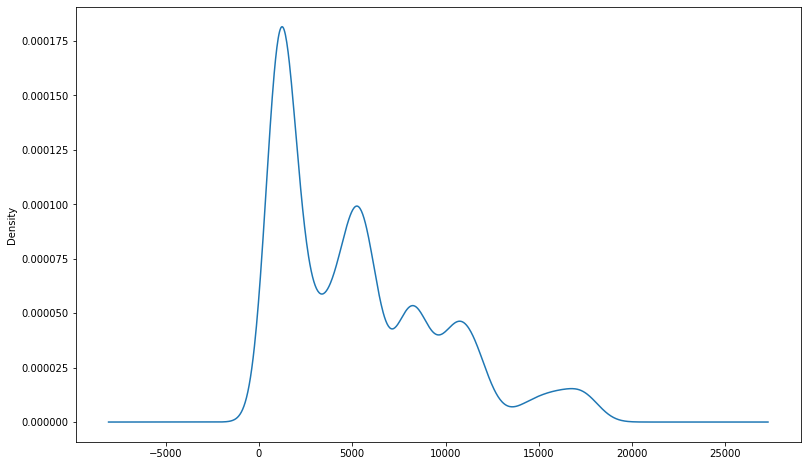

In [597]:
sprice_data["Low"].plot(kind = "density", figsize = (13,8))

Open, High, and Low have very high positive correlation. Therefore, we deduce that the stock index does not fluctuate much during a day.

In [598]:
sprice_data_corr = sprice_data.corr()
sprice_data_corr

,Open,High,Low,Close
Open,1.000000,0.999948,0.999925,0.999881
High,0.999948,1.000000,0.999902,0.999943
Low,0.999925,0.999902,1.000000,0.999940
Close,0.999881,0.999943,0.999940,1.000000


There is a weak positive correlation between P/E - (Price to Earnings Ratio) & P/B (Price-to-book value)

In [599]:
fin_data_corr = fin_data.corr()
fin_data_corr

,P/E,P/B
P/E,1.000000,0.419241
P/B,0.419241,1.000000


<AxesSubplot:xlabel='P/E', ylabel='P/B'>

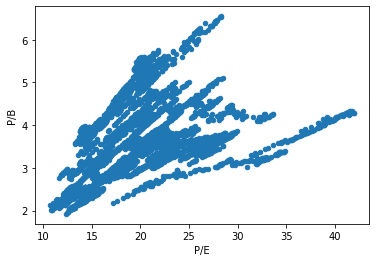

In [600]:
fin_data.plot(kind = "scatter", x = "P/E", y = "P/B")

In [601]:
features_X = ["P/E", "P/B", "Div Yield %", "Date"]
X = fin_data[features_X]
X.describe()
X

,P/E,P/B,Div Yield %,Date
0,21.18,4.15,1.35,12 Aug 2022
1,21.29,4.18,1.36,11 Aug 2022
2,21.11,4.21,1.34,10 Aug 2022
3,21.02,4.21,1.33,08 Aug 2022
4,20.86,4.18,1.29,05 Aug 2022
...,...,...,...,...
5872,12.46,2.22,1.71,07 Jan 1999
5873,12.11,2.16,1.75,06 Jan 1999
5874,11.84,2.11,1.79,05 Jan 1999
5875,11.72,2.08,1.81,04 Jan 1999


In [602]:
fin_data["Date"][0:5877]

0       12 Aug 2022
1       11 Aug 2022
2       10 Aug 2022
3       08 Aug 2022
4       05 Aug 2022
           ...     
5872    07 Jan 1999
5873    06 Jan 1999
5874    05 Jan 1999
5875    04 Jan 1999
5876    01 Jan 1999
Name: Date, Length: 5877, dtype: object

In [603]:
sprice_data["Date"][0:5877]


0       12 Aug 2022
1       11 Aug 2022
2       10 Aug 2022
3       08 Aug 2022
4       05 Aug 2022
           ...     
5872    13 Jan 1999
5873    12 Jan 1999
5874    11 Jan 1999
5875    08 Jan 1999
5876    07 Jan 1999
Name: Date, Length: 5877, dtype: object

It means that there are some missing data in fin_data. To avoid errors that might be caused by wrong input-output pairing while training the model, it is preferred to drop the corresponding dates in sprice_data for which data exists in sprice_data but not in fin_data

In [604]:
sprice_dt = sprice_data
cntr = 0
for i in range(len(fin_data["Date"])):
    if(fin_data["Date"][i] != sprice_data["Date"][i]):
        cntr += 1

cntr

5842

In [605]:
drop_dates_list = []
for i in range(len(fin_data[0:5877])):
    if sprice_data["Date"][i] != fin_data["Date"][i]:
        drop_dates_list.append(sprice_data["Date"][i])
        sprice_data = sprice_data.drop(i)
        sprice_data = sprice_data.reset_index(drop = True)
        

sprice_data 
drop_dates_list

['23 Jun 2022', '08 Jun 2022', '23 Feb 2022', '07 Dec 2020']

In [606]:
sprice_analysis_dt = sprice_data[0:5877]
sprice_analysis_dt

,Date,Open,High,Low,Close
0,12 Aug 2022,17659.65,17724.65,17597.85,17698.15
1,11 Aug 2022,17711.65,17719.30,17631.95,17659.00
2,10 Aug 2022,17566.10,17566.10,17442.80,17534.75
3,08 Aug 2022,17401.50,17548.80,17359.75,17525.10
4,05 Aug 2022,17423.65,17474.40,17348.75,17397.50
...,...,...,...,...,...
5872,07 Jan 1999,932.95,961.15,932.95,954.70
5873,06 Jan 1999,923.30,930.55,915.65,928.25
5874,05 Jan 1999,901.00,907.20,893.15,907.20
5875,04 Jan 1999,896.40,905.45,895.75,897.80


In [607]:
X["Div Yield %"].min()

list_div = []
for i in range(len(X["Div Yield %"])):
    if X["Div Yield %"][i] == "-":
        list_div.append(i)
list_div

[352]

In [608]:
X = X.drop(index = 352)
X = X.reset_index(drop = True)


In [609]:
X["Div Yield %"][352]

'1.06'

In [610]:
type(X["Div Yield %"][354])

str

In [611]:
# for i in range(len(X["Div Yield %"])):
#     X["Div Yield %"][i] = float(X["Div Yield %"][i])
# type(X["Div Yield %"][1])

X["Div Yield %"] = np.float64(X["Div Yield %"])


In [612]:
X

,P/E,P/B,Div Yield %,Date
0,21.18,4.15,1.35,12 Aug 2022
1,21.29,4.18,1.36,11 Aug 2022
2,21.11,4.21,1.34,10 Aug 2022
3,21.02,4.21,1.33,08 Aug 2022
4,20.86,4.18,1.29,05 Aug 2022
...,...,...,...,...
5871,12.46,2.22,1.71,07 Jan 1999
5872,12.11,2.16,1.75,06 Jan 1999
5873,11.84,2.11,1.79,05 Jan 1999
5874,11.72,2.08,1.81,04 Jan 1999


In [613]:
sprice_analysis_dt = sprice_analysis_dt.drop(352)

In [614]:
sprice_analysis_dt = sprice_analysis_dt.reset_index(drop = True)

In [628]:
y = sprice_analysis_dt.Open[0:2000]
sprice_analysis_dt[0:2000]


,Date,Open,High,Low,Close
0,12 Aug 2022,17659.65,17724.65,17597.85,17698.15
1,11 Aug 2022,17711.65,17719.30,17631.95,17659.00
2,10 Aug 2022,17566.10,17566.10,17442.80,17534.75
3,08 Aug 2022,17401.50,17548.80,17359.75,17525.10
4,05 Aug 2022,17423.65,17474.40,17348.75,17397.50
...,...,...,...,...,...
1995,10 Jul 2014,7589.50,7731.05,7479.05,7567.70
1996,09 Jul 2014,7637.95,7650.10,7551.65,7585.00
1997,08 Jul 2014,7804.05,7808.85,7595.90,7623.20
1998,07 Jul 2014,7780.40,7792.00,7755.10,7787.10


In [616]:
X = X[0:2000]
X

,P/E,P/B,Div Yield %,Date
0,21.18,4.15,1.35,12 Aug 2022
1,21.29,4.18,1.36,11 Aug 2022
2,21.11,4.21,1.34,10 Aug 2022
3,21.02,4.21,1.33,08 Aug 2022
4,20.86,4.18,1.29,05 Aug 2022
...,...,...,...,...
1995,20.48,3.46,1.30,10 Jul 2014
1996,20.54,3.46,1.29,09 Jul 2014
1997,20.64,3.48,1.29,08 Jul 2014
1998,21.08,3.56,1.26,07 Jul 2014


In [617]:
#log_X_PB = np.log(X["P/B"])

In [618]:
#log_X_PE = np.log(X["P/E"])
#type(X["P/E"][1])

In [619]:
log_X_Div = np.log(X["Div Yield %"])

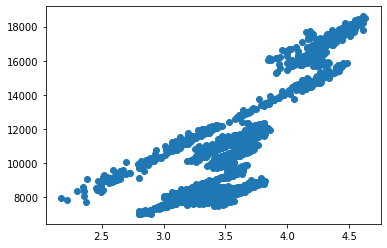

In [620]:
plt.scatter(X["P/B"], y)

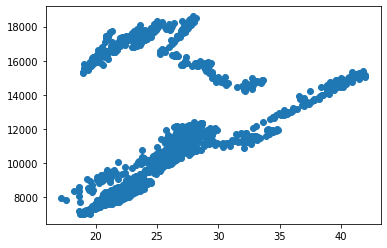

In [621]:
plt.scatter(X["P/E"], y)

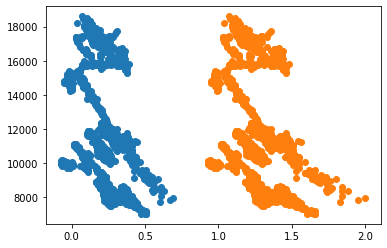

In [622]:
plt.scatter(log_X_Div, y)
plt.scatter(X["Div Yield %"], y)

In [623]:
# X["P/B"] = log_X_PE
# X["P/E"] = log_X_PB
#exp_X_Div = np.exp(X["Div Yield %"])
#X["Div Yield %"] = exp_X_Div


In [624]:
test_X, train_X, test_y, train_y = train_test_split(X, y, random_state = 1)


In [625]:
model = LinearRegression()

In [626]:
lin_model = model.fit(train_X,train_y)
print(lin_model.intercept_, lin_model.coef_,lin_model.score(train_X,train_y))

ValueError: could not convert string to float: '22 Nov 2019'

In [ ]:
y_hat_training = lin_model.predict(train_X)
training_error = mean_absolute_error(y_hat_training, train_y)
training_error


1167.8365579748347

In [ ]:
y_hat = lin_model.predict(test_X)
test_error = mean_absolute_error(y_hat, test_y)
test_error

1184.2118503446895

In [ ]:
test_y.describe()

count     1500.000000
mean     11061.201567
std       3017.544792
min       7038.250000
25%       8554.212500
50%      10522.650000
75%      11958.875000
max      18439.900000
Name: Open, dtype: float64

Therefore, The model predicts the prices with %10 error approximately.